In [285]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

url="https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data"
data = pd.read_csv(url, header=None, na_values="?")

#Ponemos nombre a las columnas (Esta información se toma del archivo original adult.names que está en el 
#repositorio junto con el archivo de datos)
data.columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [286]:
#número de registros y atributos
shape = data.shape
shape

(690, 16)

In [287]:
#tipo de datos
data. dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

In [288]:
#Medidas de centralidad y desviación para atributos numéricos:
data.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [289]:
#Medidas de centralidad para atributos categóricos:
data.mode()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,22.67,1.5,u,g,c,v,0.0,t,f,0,f,g,0.0,0,-


In [290]:
#matriz de correlación
data.corr()

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.202317,0.395751,0.185912,-0.079812,0.018553
A3,0.202317,1.000000,0.298902,0.271207,-0.224242,0.123121
A8,0.395751,0.298902,1.000000,0.322330,-0.077163,0.051345
A11,0.185912,0.271207,0.322330,1.000000,-0.120096,0.063692
A14,-0.079812,-0.224242,-0.077163,-0.120096,1.000000,0.066853
A15,0.018553,0.123121,0.051345,0.063692,0.066853,1.000000


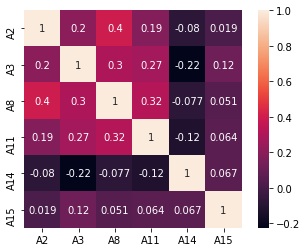

In [291]:
sns.heatmap(data.corr(), square=True, annot=True)

In [292]:
# Cual es el máximo de datos faltantes en un mismo registro?
max(data.isnull().sum(axis=1))

5

In [293]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

-    383
+    307
Name: A16, dtype: int64


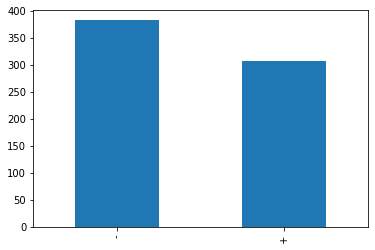

In [294]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?
clasificar = data['A16'].value_counts()
print(clasificar)
clasificar.plot(kind='bar');

In [295]:
#Eliminar los registros que tengan más de tres atributos faltantes.

data.dropna(axis = 0, thresh = 13)
data.shape

(690, 16)

In [296]:
#Para los atributos A1, A2,A4, A5, A6, A7, A14 reemplazar los datos faltantes por la moda

data.A1.fillna(data.A1.mode()[0], inplace=True)
data.A2.fillna(data.A2.mode()[0], inplace=True)
data.A14.fillna(data.A14.mode()[0], inplace=True)
data.A5.fillna(data.A5.mode()[0], inplace=True)
data.A6.fillna(data.A6.mode()[0], inplace=True)
data.A7.fillna(data.A7.mode()[0], inplace=True)
data.A4.fillna(data.A4.mode()[0], inplace=True)

In [297]:
#Verificar que no hayan datos faltantes
data.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [298]:
#Transformar los atributos categóricos a datos númericos

labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
data['A1'] = labelencoder.fit_transform(data['A1'])
data['A4'] = labelencoder.fit_transform(data['A4'])
data['A5'] = labelencoder.fit_transform(data['A5'])
data['A6'] = labelencoder.fit_transform(data['A6'])
data['A7'] = labelencoder.fit_transform(data['A7'])
data['A9'] = labelencoder.fit_transform(data['A9'])
data['A10'] = labelencoder.fit_transform(data['A10'])
data['A12'] = labelencoder.fit_transform(data['A12'])
data['A13'] = labelencoder.fit_transform(data['A13'])
data['A16'] = labelencoder.fit_transform(data['A16'])

data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,260.0,0,1
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,1,0,200.0,394,1
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,1,0,200.0,1,1
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,0,280.0,750,1


In [299]:
#matriz de correlación
data.corr()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
A1,1.000000,0.033898,-0.041746,0.073291,0.069792,-0.017139,0.053600,0.086544,-0.026047,-0.077784,-0.024630,0.051674,0.085488,0.086007,-0.002063,0.028934
A2,0.033898,1.000000,0.203143,-0.092101,-0.104887,0.012422,-0.169115,0.387792,0.203968,0.090137,0.189993,0.051245,-0.018165,-0.082912,0.018994,-0.168134
A3,-0.041746,0.203143,1.000000,-0.091526,-0.079364,0.023373,-0.047534,0.298902,0.244317,0.174846,0.271207,-0.013023,-0.122233,-0.217903,0.123121,-0.206294
A4,0.073291,-0.092101,-0.091526,1.000000,0.982257,-0.049977,-0.025360,-0.080624,-0.129863,-0.162464,-0.106457,-0.004964,-0.045169,0.001858,-0.120065,0.194306
A5,0.069792,-0.104887,-0.079364,0.982257,1.000000,-0.055812,-0.030136,-0.073064,-0.142094,-0.173199,-0.112750,0.006113,-0.021402,0.013328,-0.025170,0.185134
A6,-0.017139,0.012422,0.023373,-0.049977,-0.055812,1.000000,-0.000607,0.037001,0.109642,0.128549,0.006978,0.074210,-0.010455,0.086612,0.004808,-0.130434
A7,0.053600,-0.169115,-0.047534,-0.025360,-0.030136,-0.000607,1.000000,-0.103549,-0.036520,-0.002420,-0.036518,-0.008281,0.036243,-0.017336,-0.017261,-0.000866
A8,0.086544,0.387792,0.298902,-0.080624,-0.073064,0.037001,-0.103549,1.000000,0.345689,0.222982,0.322330,0.138139,-0.020528,-0.070495,0.051345,-0.322475
A9,-0.026047,0.203968,0.244317,-0.129863,-0.142094,0.109642,-0.036520,0.345689,1.000000,0.432032,0.379532,0.091276,-0.113623,-0.055010,0.090012,-0.720407
A10,-0.077784,0.090137,0.174846,-0.162464,-0.173199,0.128549,-0.002420,0.222982,0.432032,1.000000,0.571498,0.017043,-0.242568,-0.044834,0.077652,-0.458301


In [300]:
#Verificar la matriz de correlación 

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                print('Las columnas que presentan una alta correlación son:', corr_matrix.columns[i], corr_matrix.columns[j])
    return dataset

data = correlation(data,0.90)

Las columnas que presentan una alta correlación son: A5 A4


In [301]:
#Eliminar el atributo A5
del data['A5']
data

,A1,A2,A3,A4,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,1,12,7,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,1,10,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,1,10,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,1,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,1,12,7,1.71,1,0,0,0,2,120.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,4,3,1.25,0,0,0,0,0,260.0,0,1
686,0,22.67,0.750,1,1,7,2.00,0,1,2,1,0,200.0,394,1
687,0,25.25,13.500,2,5,2,2.00,0,1,1,1,0,200.0,1,1
688,1,17.92,0.205,1,0,7,0.04,0,0,0,0,0,280.0,750,1


In [302]:
#Ajuste
#Normalizar los valores de los atributos A2, A3, A8, A11, A14, A15

data['A2'] = preprocessing.scale(data['A2'])
data['A3'] = preprocessing.scale(data['A3'])
data['A8'] = preprocessing.scale(data['A8'])
data['A11'] = preprocessing.scale(data['A11'])
data['A14'] = preprocessing.scale(data['A14'])
data['A15'] = preprocessing.scale(data['A15'])
data

,A1,A2,A3,A4,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,-0.049020,-0.956613,1,12,7,-0.291083,1,1,-0.288101,0,0,0.123399,-0.195413,0
1,0,2.290149,-0.060051,1,10,3,0.244190,1,1,0.740830,0,0,-0.791213,-0.087852,0
2,0,-0.580879,-0.856102,1,10,3,-0.216324,1,0,-0.493887,0,0,0.572076,-0.037144,0
3,1,-0.301086,-0.647038,1,12,7,0.456505,1,1,0.535044,1,0,-0.463333,-0.194837,0
4,1,-0.944693,0.174141,1,12,7,-0.153526,1,0,-0.493887,0,2,-0.348288,-0.195413,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,-0.868234,1.070704,2,4,3,-0.291083,0,0,-0.493887,0,0,0.457031,-0.195413,1
686,0,-0.734639,-0.805846,1,1,7,-0.066806,0,1,-0.082314,1,0,0.111894,-0.119736,1
687,0,-0.517862,1.757198,2,5,2,-0.066806,0,1,-0.288101,1,0,0.111894,-0.195221,1
688,1,-1.133743,-0.915403,1,0,7,-0.652915,0,0,-0.493887,0,0,0.572076,-0.051358,1


In [303]:
#Generar un conjunto de datos alterno con un menor desbalance para comparar.

#g = data.groupby('A16')
#dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
#dataBal.shape

#AJUSTEE
#Como cambio para mejorar el desempeño ahora se generan datos para hacer crecer el de menor desbalance
max_size = 383
lst = [data]

for class_index, group in data.groupby('A16'):
    lst.append(group.sample(max_size - len(group),replace=True))
    
dataBal = pd.concat(lst)


1    383
0    383
Name: A16, dtype: int64


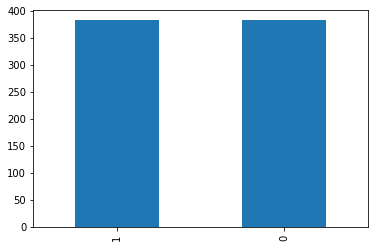

In [304]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?
clasificar = dataBal['A16'].value_counts()
print(clasificar)
clasificar.plot(kind='bar');

In [305]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import statistics


In [308]:
# Realizamos el holdout

HOLDOUT = 10

h_precisionP = []
h_recallP = []
h_f1scoreP = []
h_precisionM = []
h_recallM = []
h_f1scoreM = []

for i in range(HOLDOUT):
    X_train, X_test, y_train, y_test = train_test_split(dataBal.drop(['A16'],axis=1), dataBal['A16'], test_size=0.4)

    # Se crea el clasificador base
    mlp = MLPClassifier(max_iter=500)
    parameter_space = {
        'hidden_layer_sizes': [(5), (10), (50)],
        'activation': ['logistic', 'tanh', 'relu'],
    }
    #se selecciona el mejor numero de capas, nodos, y funcion de activación
    clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, refit=True)
    clf.fit(X_train,y_train)
    # Se hace la prediccion sobre los datos de prueba
    pred = clf.predict(X_test)
    # Se calculan metricas a partir de los datos de prueba
    mat = confusion_matrix(y_test, pred)
    #print(mat)
    #print("Precision:",precision_score(y_test,pred))
    #print("Recall:",recall_score(y_test,pred))
    #print("F1score:",f1_score(y_test,pred))
    h_precisionP.append(precision_score(y_test,pred))
    h_recallP.append(recall_score(y_test,pred))
    h_f1scoreP.append(f1_score(y_test,pred))
 

    #modelo SVC
    modeloSVC = SVC()
    #Se entrena el modeloSVC
    modeloSVC.fit(X_train, y_train)
    #Se hace la predicción
    y_pred = modeloSVC.predict(X_test)
    # Se calculan metricas a partir de los datos de prueba
    matriz = confusion_matrix(y_test, y_pred)
    h_precisionM.append(precision_score(y_test,y_pred))
    h_recallM.append(recall_score(y_test,y_pred))
    h_f1scoreM.append(f1_score(y_test,y_pred))

print("Reporte del Holdout\n")

print("Medidas de Perceptrón multicapa")
print("Medias de precision, recall y f1score:",statistics.mean(h_precisionP),statistics.mean(h_recallP),statistics.mean(h_f1scoreP))
print("Desviaciones de precision, recall y f1score:",statistics.stdev(h_precisionP),statistics.stdev(h_recallP),statistics.stdev(h_f1scoreP))
print("")
  
print("Medidas de vectores de soporte")
print("Medias de precision, recall y f1score:",statistics.mean(h_precisionM),statistics.mean(h_recallM),statistics.mean(h_f1scoreM))
print("Desviaciones de precision, recall y f1score:",statistics.stdev(h_precisionM),statistics.stdev(h_recallM),statistics.stdev(h_f1scoreM))
print("")

/home/katherine/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/katherine/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/katherine/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/katherine/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization h

Reporte del Holdout

Medidas de Perceptrón multicapa
Medias de precision, recall y f1score: 0.8794742456025116 0.8466932041685493 0.861766818396206
Desviaciones de precision, recall y f1score: 0.04464583002195874 0.029692093045401633 0.021124533520396525

Medidas de vectores de soporte
Medias de precision, recall y f1score: 0.8757837639353855 0.846491544545712 0.8600205948769842
Desviaciones de precision, recall y f1score: 0.04183342269841133 0.024515597646981035 0.017783775099552403



/home/katherine/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
